<a href="https://colab.research.google.com/github/Sushmithaa-Pandian/NLP/blob/main/Yelp_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
reviews = pd.read_json('/content/gdrive/MyDrive/yelp_academic_dataset_review.json', nrows=10000, lines=True)

In [ ]:
tip=pd.read_json("/content/gdrive/MyDrive/yelp_academic_dataset_tip.json",lines=True)

In [ ]:
user=pd.read_json("/content/gdrive/MyDrive/yelp_academic_dataset_user.json",nrows=10000,lines=True)

In [ ]:
checkin=pd.read_json("/content/gdrive/MyDrive/yelp_academic_dataset_checkin.json",nrows=10000,lines=True)

In [ ]:
business=pd.read_json("/content/gdrive/MyDrive/yelp_academic_dataset_business.json",lines=True)

In [ ]:
checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [ ]:
tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [ ]:
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
df1= reviews.merge(business, how='inner', on='business_id')

In [ ]:
df1.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2,0,0,0,This is the second time we tried turning point...,2017-05-13 17:06:55,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
2,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4,2,0,1,The place is cute and the staff was very frien...,2017-08-08 00:58:18,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
3,WqgTKVqWVHDHjnjEsBvUgg,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,We came on a Saturday morning after waiting a ...,2017-11-19 02:20:23,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
4,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,PA,19119,39.952103,-75.172753,5.0,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3..."


In [ ]:
df2=df1.merge(user, how='inner', on='user_id')

In [ ]:
df2.head()

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,name_x,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,EJWyA5wpdVMji1j4TwSZqQ,mqBWACmaHflW4eh_Ofp16Q,kxX2SOes4o-D3ZQBkiMRfA,5,13,6,5,After a long hiatus from reviewing I have awak...,2010-08-20 19:16:04,Zaika,...,3,0,1,0,8,11,11,11,2,0
1,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05,BK Tacos,...,0,1,1,0,5,4,3,3,9,0
2,yNAmr9WPJjC05wTXiIap9A,4Uh27DgGzsp6PqrH913giQ,Y3ZCO17N1_T_Ms1JmswwzA,4,2,5,4,"During my visit last week, I ate so many shrim...",2011-08-25 03:46:43,Taqueria Pico De Gallo,...,0,1,1,0,5,4,3,3,9,0
3,Jdv79tiBnTKHKZoMih_Fqg,NiEs4XaVXTPLPCvuBu0DpA,otQS34_MymijPTdNBoBdCw,3,2,0,0,I consider myself a connoisseur of both Mexica...,2011-09-25 23:56:50,BK Tacos,...,0,0,0,0,5,0,4,4,1,0
4,rzrBiijeQh7ubjfRCr-UtA,Kj-u8Yq1d3mLKitWsDAxpg,YtSqYv1Q_pOltsVPSx54SA,4,12,11,11,"A very upscale and respected chain, with a sho...",2008-04-30 15:26:12,Rittenhouse Grill,...,1220,1387,1224,1165,2238,5906,8258,8258,2613,2296


In [ ]:
df3=df2.merge(tip,how="inner",on='business_id')

In [ ]:
df3.head()

,review_id,user_id_x,business_id,stars_x,useful_x,funny_x,cool_x,text_x,date_x,name_x,...,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,user_id_y,text_y,date_y,compliment_count
0,EJWyA5wpdVMji1j4TwSZqQ,mqBWACmaHflW4eh_Ofp16Q,kxX2SOes4o-D3ZQBkiMRfA,5,13,6,5,After a long hiatus from reviewing I have awak...,2010-08-20 19:16:04,Zaika,...,8,11,11,11,2,0,VHNNm6LoBMgllosZOUe6jQ,"He got our order wrong, waiting ""10-15"" more m...",2012-08-02 23:56:05,0
1,EJWyA5wpdVMji1j4TwSZqQ,mqBWACmaHflW4eh_Ofp16Q,kxX2SOes4o-D3ZQBkiMRfA,5,13,6,5,After a long hiatus from reviewing I have awak...,2010-08-20 19:16:04,Zaika,...,8,11,11,11,2,0,EMMKdK1cGrLSo08wgSYHJQ,Very hole in the wall. They sell Indian dry go...,2012-06-05 22:53:10,0
2,EJWyA5wpdVMji1j4TwSZqQ,mqBWACmaHflW4eh_Ofp16Q,kxX2SOes4o-D3ZQBkiMRfA,5,13,6,5,After a long hiatus from reviewing I have awak...,2010-08-20 19:16:04,Zaika,...,8,11,11,11,2,0,sRlLCiXv8HVGmPGh3swbAA,"If ur eating in, get the chicken 65 to Munch o...",2012-05-26 14:20:53,0
3,EJWyA5wpdVMji1j4TwSZqQ,mqBWACmaHflW4eh_Ofp16Q,kxX2SOes4o-D3ZQBkiMRfA,5,13,6,5,After a long hiatus from reviewing I have awak...,2010-08-20 19:16:04,Zaika,...,8,11,11,11,2,0,jnx_1zX4M_s1k_MrGJmmsg,Check out the new dining room! It's beautiful!,2016-05-21 23:02:36,0
4,EJWyA5wpdVMji1j4TwSZqQ,mqBWACmaHflW4eh_Ofp16Q,kxX2SOes4o-D3ZQBkiMRfA,5,13,6,5,After a long hiatus from reviewing I have awak...,2010-08-20 19:16:04,Zaika,...,8,11,11,11,2,0,aUOzebz5Dg5DdViicFKnjA,Cheese naan & butter chicken...hmmmm!!,2016-05-01 15:58:07,0


In [ ]:
df4=df3.merge(checkin,how="inner",on="business_id")

In [ ]:
df4.head()

,review_id,user_id_x,business_id,stars_x,useful_x,funny_x,cool_x,text_x,date_x,name_x,...,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,user_id_y,text_y,date_y,compliment_count,date
0,-7LkjSPzfVgnVpuVuRuOow,uAu772KpSkb-tPFgZmU-lA,2GYg3liJ9-m6Z67L_4_BRQ,5,7,0,3,I LOVE Weaver's Way and really disagree with s...,2008-12-03 04:13:43,Weavers Way Co-Op,...,30,46,46,26,4,kDscq7UhtBUcFc4J_obgSw,My neighborhood grocery store. All organic and...,2013-06-09 14:16:09,0,"2010-07-29 14:15:36, 2010-08-03 13:07:03, 2010..."
1,-7LkjSPzfVgnVpuVuRuOow,uAu772KpSkb-tPFgZmU-lA,2GYg3liJ9-m6Z67L_4_BRQ,5,7,0,3,I LOVE Weaver's Way and really disagree with s...,2008-12-03 04:13:43,Weavers Way Co-Op,...,30,46,46,26,4,3QnoTcrxuafMCoTzW_AH7A,A yearly buy-in is just $30 which allows you t...,2016-04-19 14:30:32,0,"2010-07-29 14:15:36, 2010-08-03 13:07:03, 2010..."
2,-7LkjSPzfVgnVpuVuRuOow,uAu772KpSkb-tPFgZmU-lA,2GYg3liJ9-m6Z67L_4_BRQ,5,7,0,3,I LOVE Weaver's Way and really disagree with s...,2008-12-03 04:13:43,Weavers Way Co-Op,...,30,46,46,26,4,s8C7D6o_KI199rZYSFWjKw,Love the chicken salad here!,2014-11-17 01:14:01,0,"2010-07-29 14:15:36, 2010-08-03 13:07:03, 2010..."
3,-7LkjSPzfVgnVpuVuRuOow,uAu772KpSkb-tPFgZmU-lA,2GYg3liJ9-m6Z67L_4_BRQ,5,7,0,3,I LOVE Weaver's Way and really disagree with s...,2008-12-03 04:13:43,Weavers Way Co-Op,...,30,46,46,26,4,Lp6jT2G9dxkOLF6g2_eoqA,Gala apples!,2011-08-30 20:36:42,0,"2010-07-29 14:15:36, 2010-08-03 13:07:03, 2010..."
4,-7LkjSPzfVgnVpuVuRuOow,uAu772KpSkb-tPFgZmU-lA,2GYg3liJ9-m6Z67L_4_BRQ,5,7,0,3,I LOVE Weaver's Way and really disagree with s...,2008-12-03 04:13:43,Weavers Way Co-Op,...,30,46,46,26,4,yNEuxv_oq2w2bVkMy7Gz6A,Great place good tastes.,2013-06-28 19:19:05,0,"2010-07-29 14:15:36, 2010-08-03 13:07:03, 2010..."


In [ ]:
df4.corr()

<ipython-input-21-d025aacce9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4.corr()


,stars_x,useful_x,funny_x,cool_x,latitude,longitude,stars_y,review_count_x,is_open,review_count_y,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,compliment_count
stars_x,1.000000,-0.150013,-0.128105,0.020130,-0.251959,-0.095182,0.469296,0.303503,0.225136,-0.050482,...,-0.019985,0.027499,-0.008668,0.045146,0.088314,-0.000216,-0.000216,-0.001092,-0.009180,0.010441
useful_x,-0.150013,1.000000,0.479400,0.387154,-0.022735,0.060271,-0.218643,-0.049810,0.102514,0.138271,...,0.151156,0.227026,0.221680,0.221801,0.195885,0.210457,0.210457,0.210742,0.133714,0.018945
funny_x,-0.128105,0.479400,1.000000,0.704811,0.191825,-0.151696,-0.207392,-0.170528,0.087406,0.247205,...,0.205164,0.328774,0.330999,0.358350,0.291456,0.340400,0.340400,0.345822,0.177819,0.019117
cool_x,0.020130,0.387154,0.704811,1.000000,0.209099,-0.160668,-0.092583,-0.223303,0.065815,0.477846,...,0.564522,0.679038,0.670679,0.624659,0.531144,0.668646,0.668646,0.649986,0.509285,0.001447
latitude,-0.251959,-0.022735,0.191825,0.209099,1.000000,0.099964,-0.325480,-0.474530,0.056106,0.174388,...,0.106145,0.119971,0.111795,0.110659,0.091569,0.131127,0.131127,0.157085,0.122198,-0.028004
longitude,-0.095182,0.060271,-0.151696,-0.160668,0.099964,1.000000,-0.395360,-0.157594,-0.103054,-0.218527,...,-0.231740,-0.233008,-0.218224,-0.161233,-0.088754,-0.269933,-0.269933,-0.195093,-0.179077,-0.016027
stars_y,0.469296,-0.218643,-0.207392,-0.092583,-0.325480,-0.395360,1.000000,0.571857,0.121029,0.080834,...,0.156219,0.128716,0.095206,0.022696,-0.024873,0.134729,0.134729,0.062323,0.108338,-0.000014
review_count_x,0.303503,-0.049810,-0.170528,-0.223303,-0.474530,-0.157594,0.571857,1.000000,0.278469,-0.132411,...,-0.045201,-0.051484,-0.073491,-0.137901,-0.150057,-0.068956,-0.068956,-0.133674,-0.093998,-0.020339
is_open,0.225136,0.102514,0.087406,0.065815,0.056106,-0.103054,0.121029,0.278469,1.000000,0.032795,...,0.038504,0.072657,0.040203,0.050057,0.058946,0.064027,0.064027,0.066405,0.037333,-0.040868
review_count_y,-0.050482,0.138271,0.247205,0.477846,0.174388,-0.218527,0.080834,-0.132411,0.032795,1.000000,...,0.832455,0.698631,0.741344,0.642417,0.514460,0.828423,0.828423,0.875821,0.841290,-0.004972


<ipython-input-22-11876fc6cb1f>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df4.corr(), ax=ax, annot=True)


<Axes: >

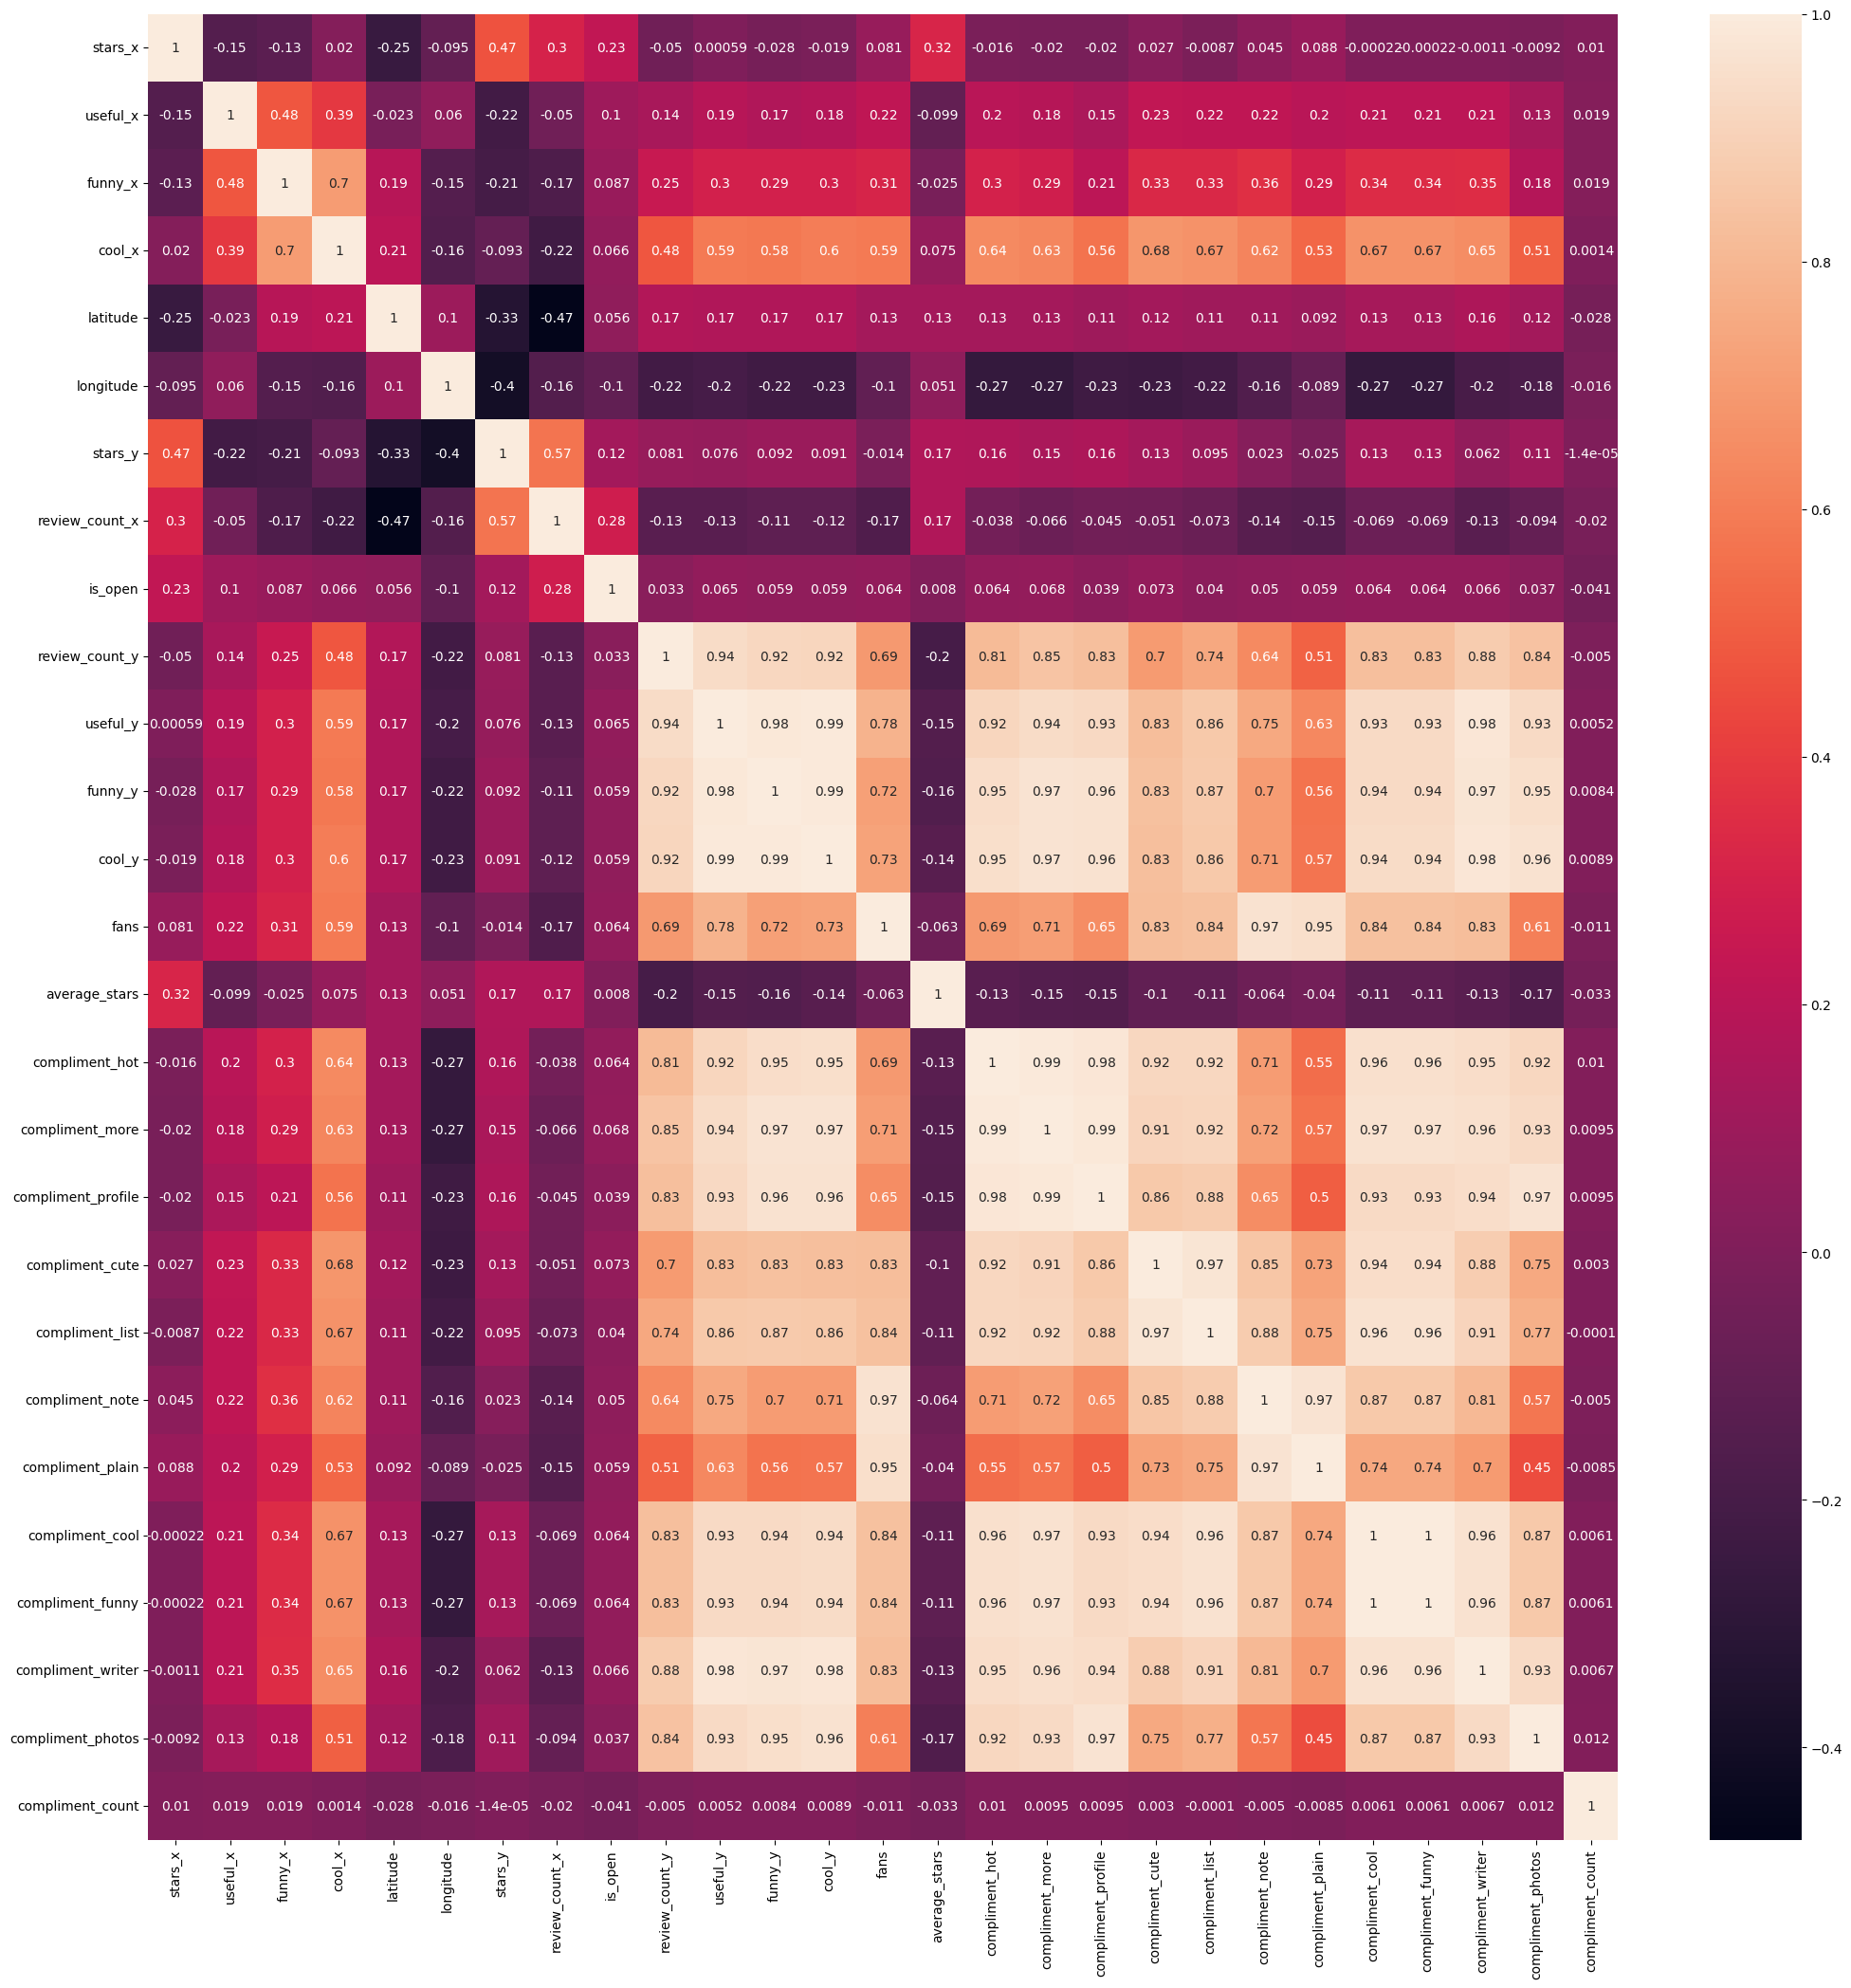

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(df4.corr(), ax=ax, annot=True)

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN


    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix ', fontsize=15)
    plt.show()

<ipython-input-23-435725007ea6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-23-435725007ea6>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


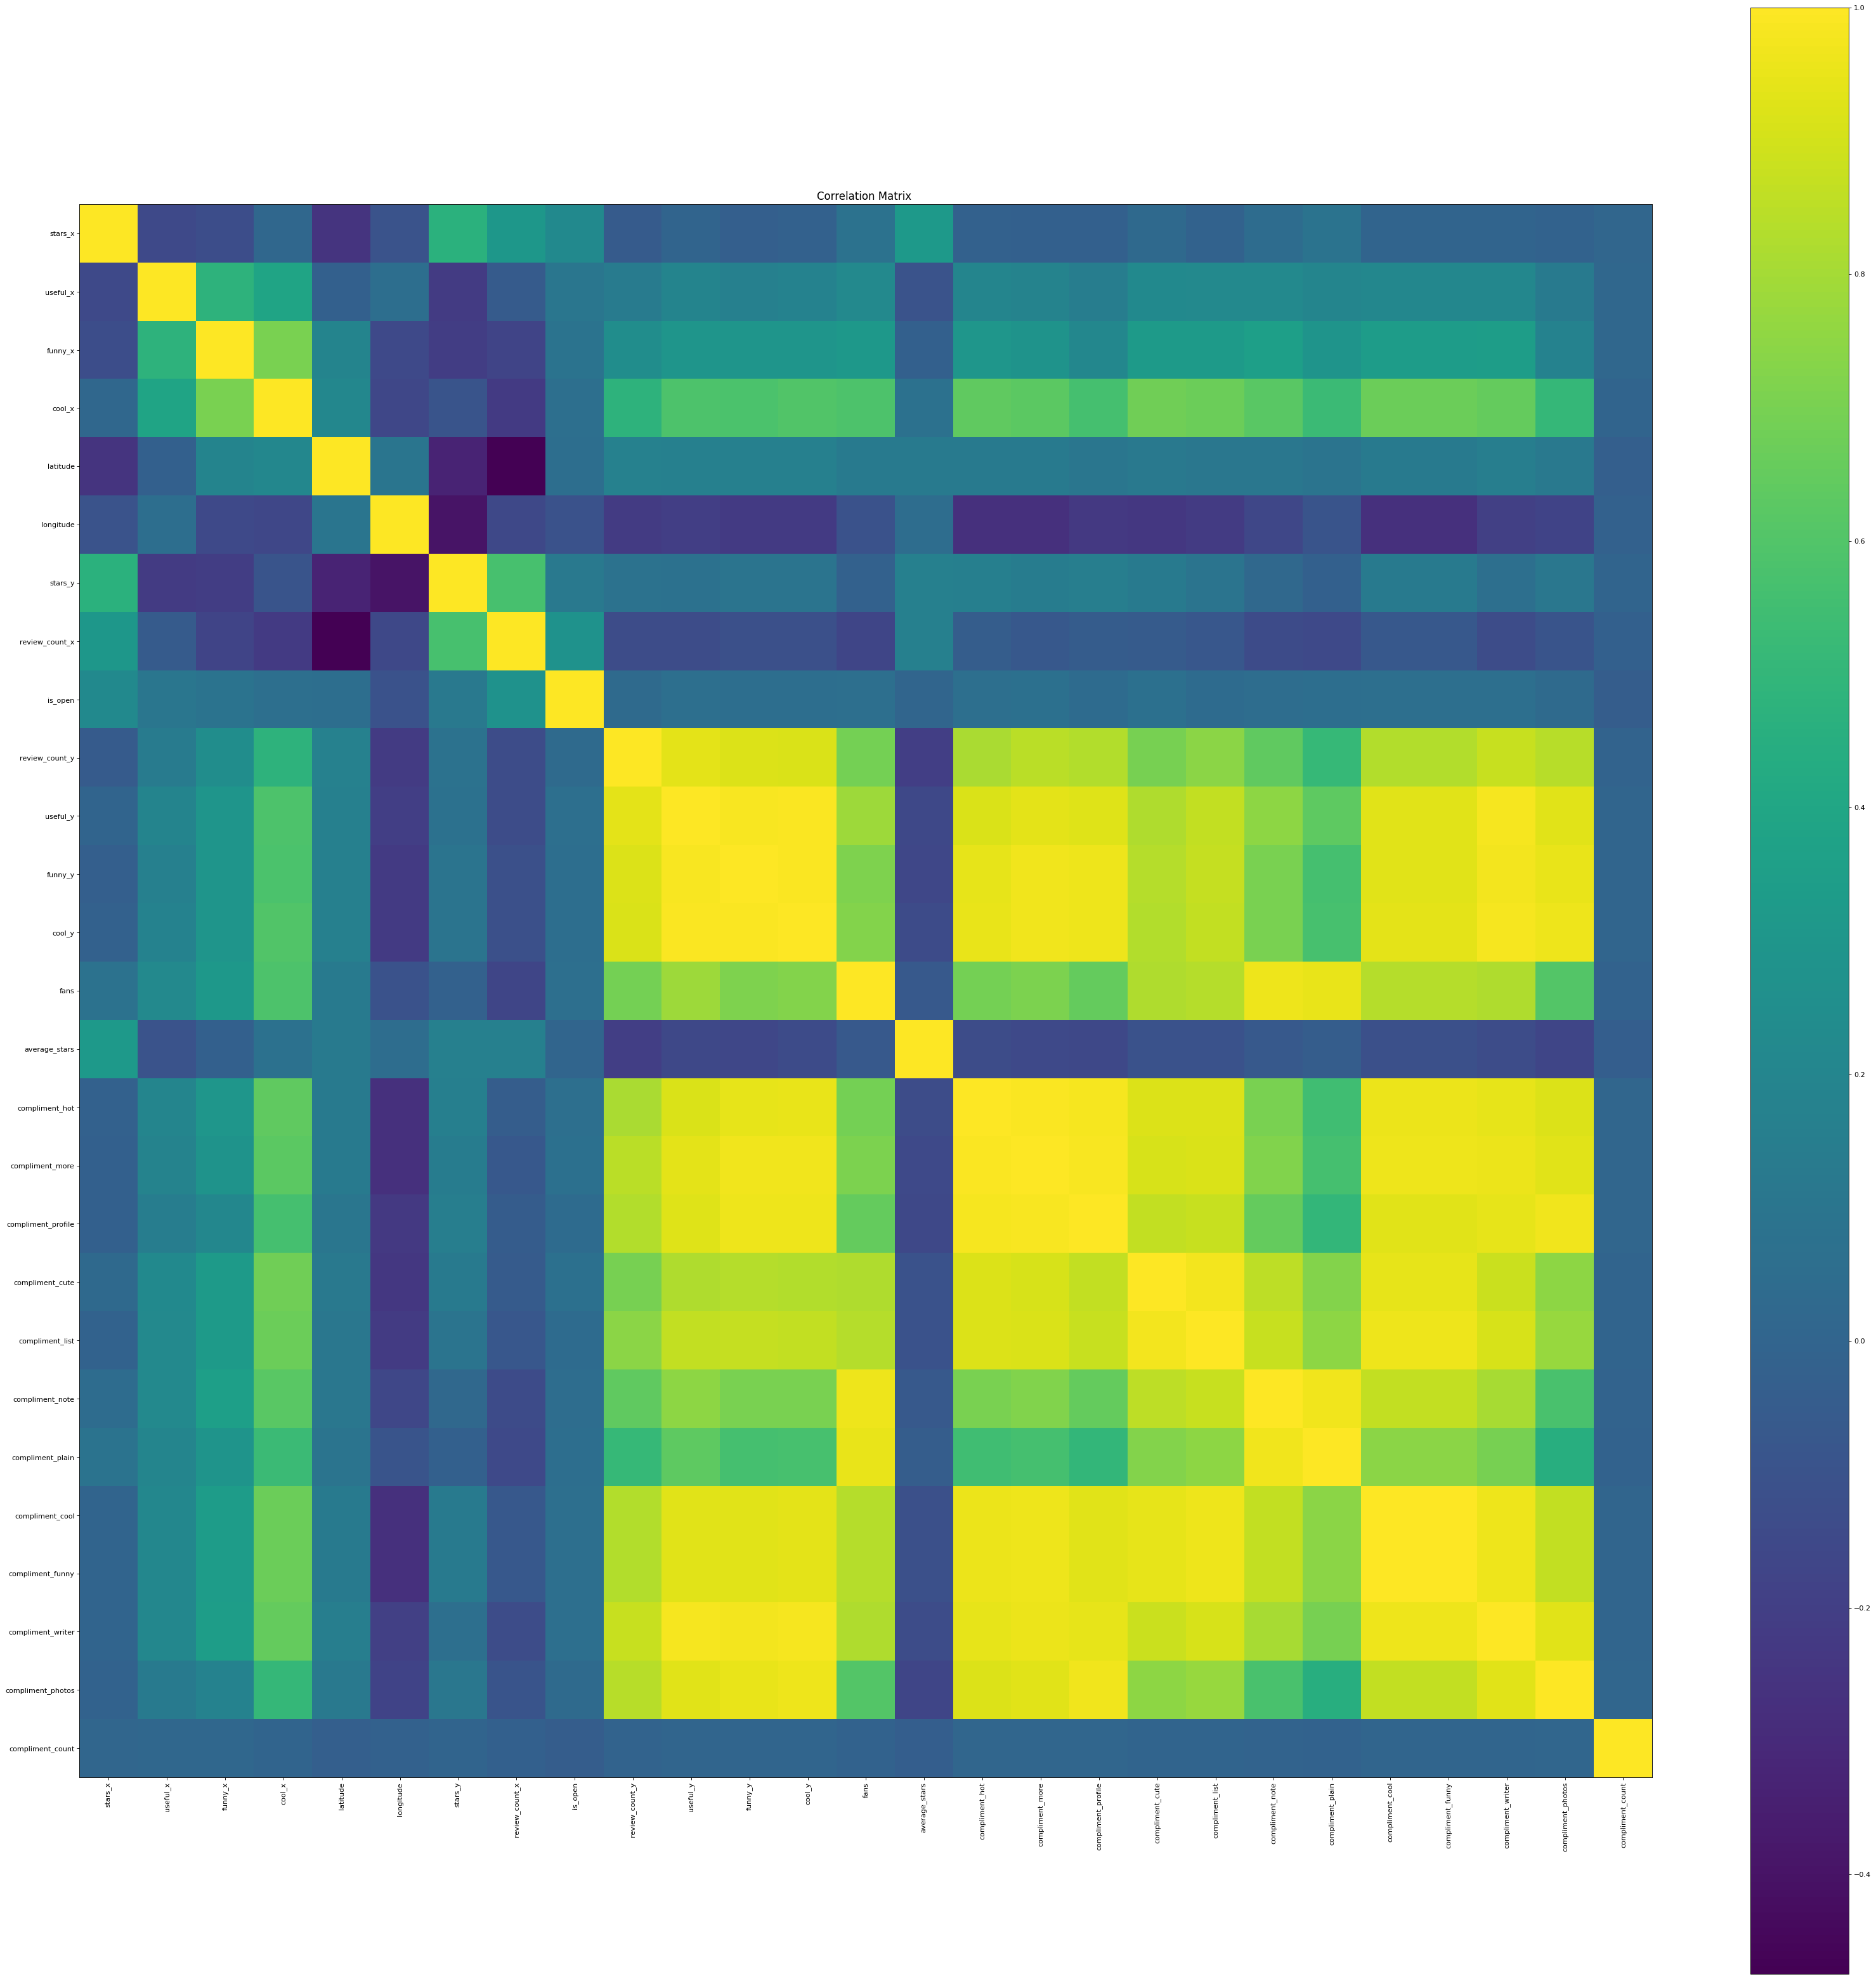

In [ ]:
plotCorrelationMatrix(df4, 50)

In [ ]:
cols_to_drop = ['review_id', 'user_id', 'useful', 'funny', 'cool', 'date']
reviews.drop(cols_to_drop, axis=1, inplace=True)
reviews.head()

,business_id,stars,text
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is..."
1,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...
2,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...
3,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo..."
4,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...


Text(0.5, 1.0, 'Number of Businesses for each Star Rating')

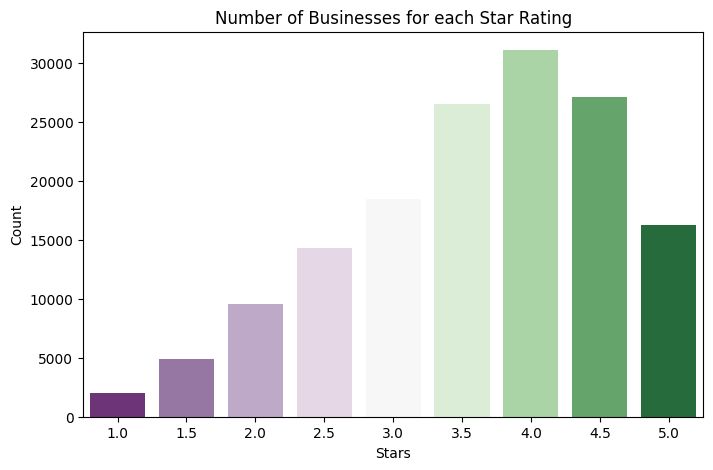

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot( x='stars' , data = business, palette='PRGn')
ax.set_ylabel('Count')
ax.set_xlabel('Stars')
ax.set_title('Number of Businesses for each Star Rating')

Text(0.5, 1.0, 'Number of Businesses on Yelp by State (Top 15)')

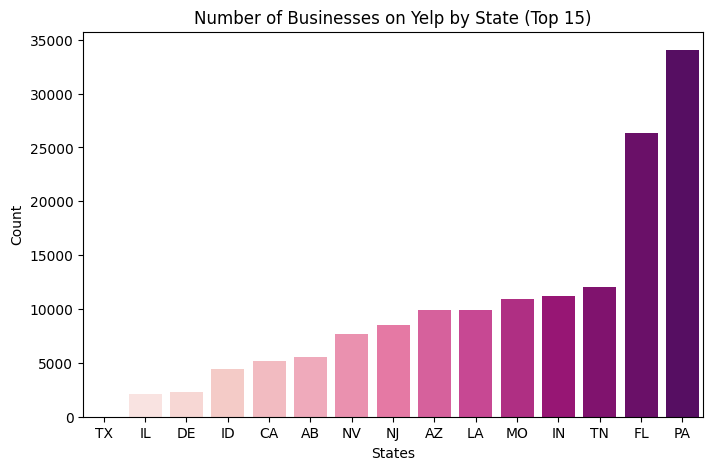

In [ ]:
top15 = business['state'].value_counts(ascending=True).tail(15).to_frame()

plt.figure(figsize=(8,5))
ax = sns.barplot(x=top15.index,y='state', data=top15, palette='RdPu')
ax.set_ylabel('Count')
ax.set_xlabel('States')
ax.set_title('Number of Businesses on Yelp by State (Top 15)')

Text(0.5, 1.0, 'Number of Business under a Category Type')

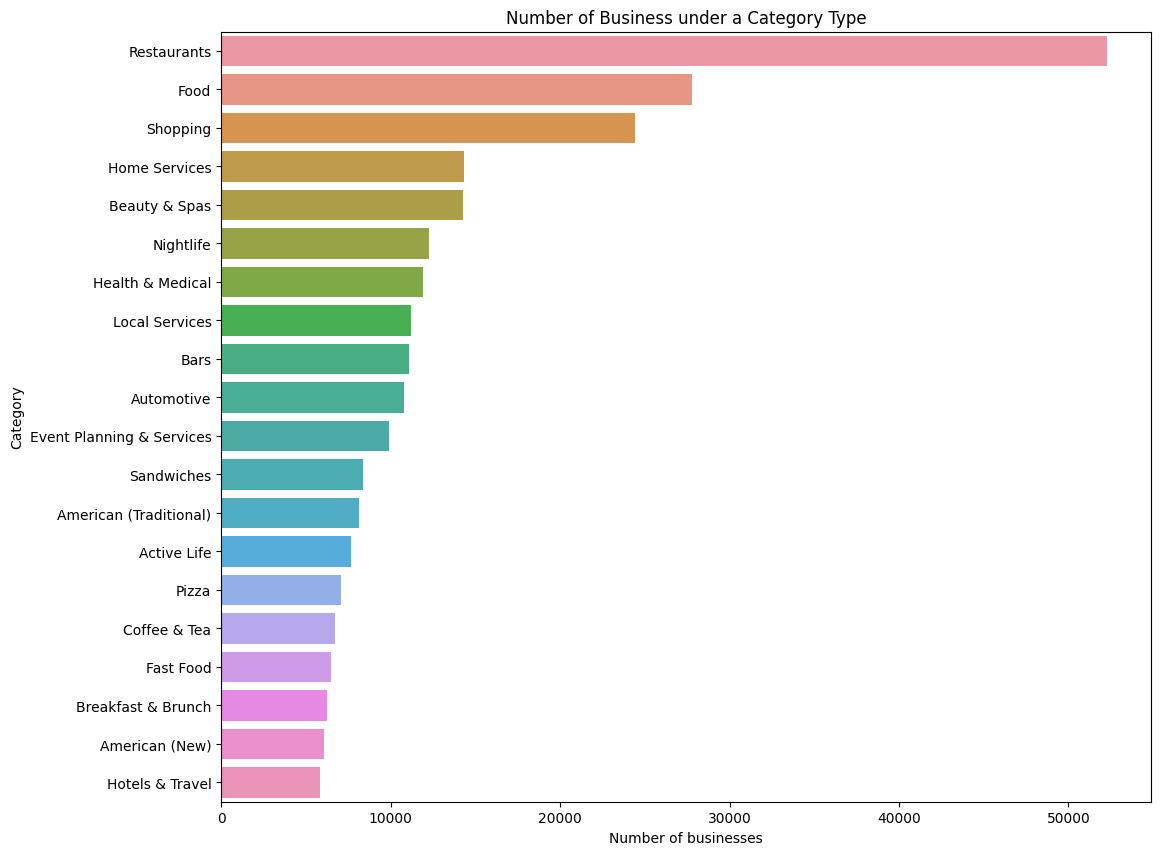

In [ ]:
business_cats=', '.join(business['categories'].dropna())
cats=pd.DataFrame(business_cats.split(', '),columns=['category'])
cats_ser = cats.category.value_counts()
cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)
plt.figure(figsize=(12,10))
ax = sns.barplot( y= 'index',x = 'category' , data = cats_df.iloc[0:20])
ax.set_ylabel('Category')
ax.set_xlabel('Number of businesses')
ax.set_title('Number of Business under a Category Type')

<ipython-input-23-435725007ea6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-23-435725007ea6>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


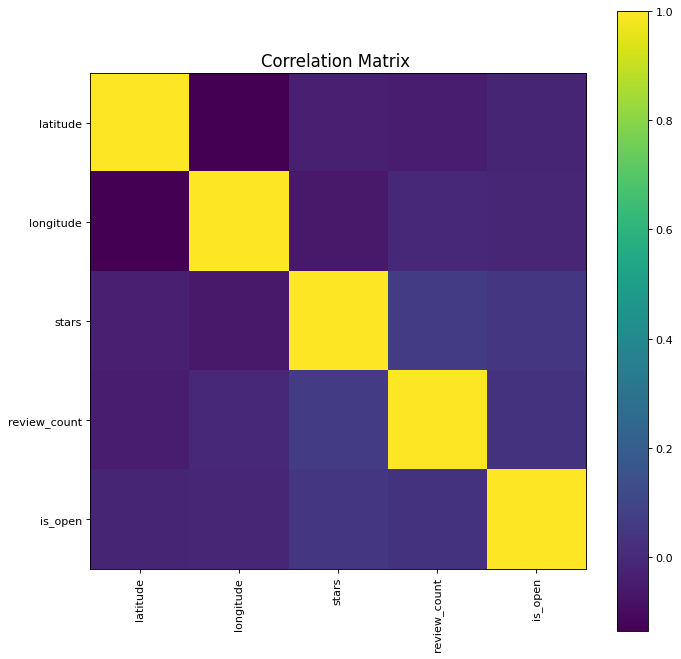

In [ ]:
plotCorrelationMatrix(business, 10)

<ipython-input-23-435725007ea6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-23-435725007ea6>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


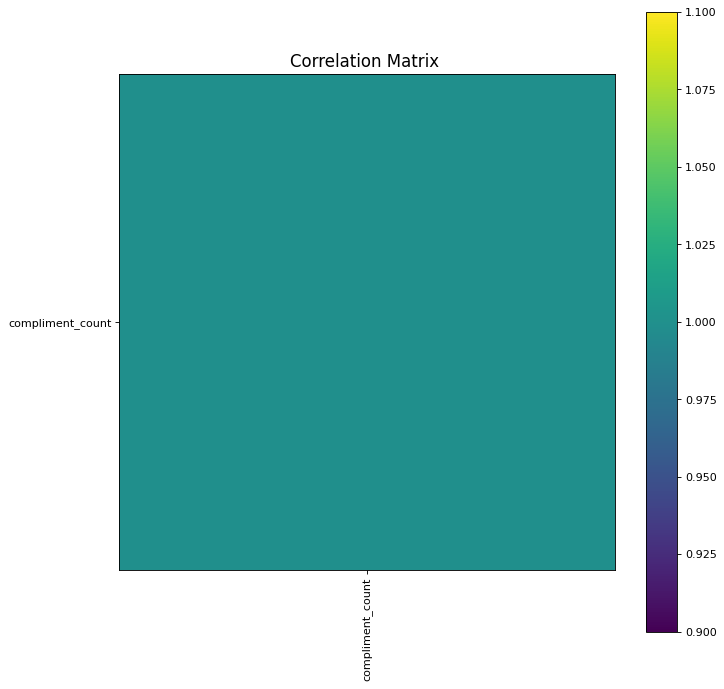

In [ ]:
plotCorrelationMatrix(tip, 10)

<ipython-input-23-435725007ea6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-23-435725007ea6>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


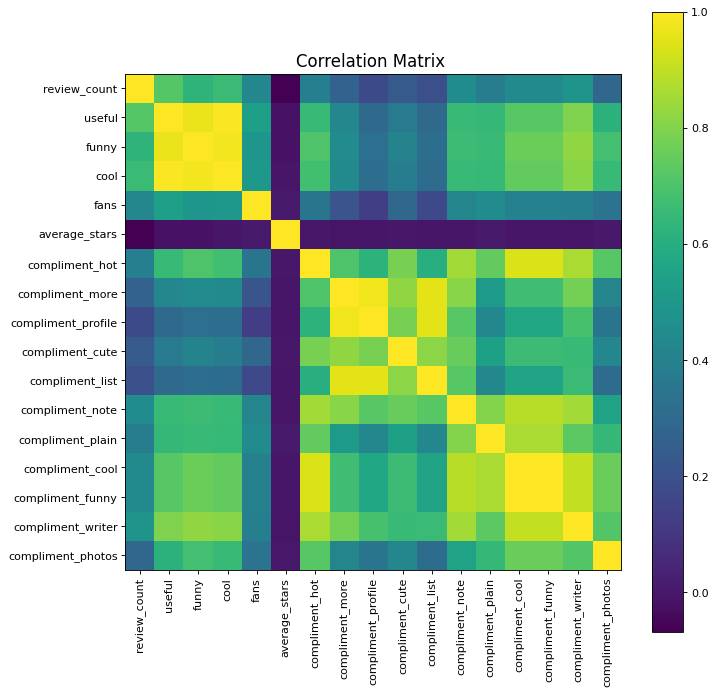

In [ ]:
plotCorrelationMatrix(user, 10)

<ipython-input-23-435725007ea6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-23-435725007ea6>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


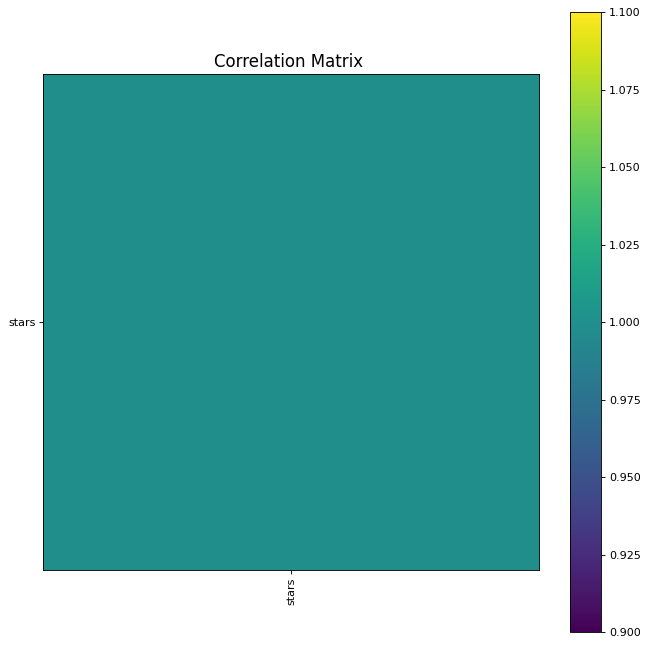

In [ ]:
plotCorrelationMatrix(reviews, 10)

In [ ]:
business = business[business['categories'].notnull()]
df_rest = business[business['categories'].str.contains('Restaurant')]
df_rest = df_rest[['business_id', 'categories']]
df_rest.head()

,business_id,categories
3,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
5,CF33F8-E6oudUQ46HnavjQ,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
8,k0hlBqXX-Bt0vf1op7Jr1w,"Pubs, Restaurants, Italian, Bars, American (Tr..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."
11,eEOYSgkmpB90uNA7lDOMRA,"Vietnamese, Food, Restaurants, Food Trucks"


In [ ]:
df_merged = reviews.merge(df_rest, how='inner', on='business_id')

In [ ]:
df_merged.head()

,business_id,stars,text,categories
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...","Restaurants, Breakfast & Brunch, Food, Juice B..."
1,XQfwVwDr-v0ZS3_CbbE5Xw,2,This is the second time we tried turning point...,"Restaurants, Breakfast & Brunch, Food, Juice B..."
2,XQfwVwDr-v0ZS3_CbbE5Xw,4,The place is cute and the staff was very frien...,"Restaurants, Breakfast & Brunch, Food, Juice B..."
3,XQfwVwDr-v0ZS3_CbbE5Xw,3,We came on a Saturday morning after waiting a ...,"Restaurants, Breakfast & Brunch, Food, Juice B..."
4,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,"Restaurants, Breakfast & Brunch"


In [ ]:
df_merged.rename(columns={'text':'restaurant_reviews'}, inplace=True)
df_merged.drop('business_id', axis=1, inplace=True)

In [ ]:
df_merged.head()


,stars,restaurant_reviews,categories
0,3,"If you decide to eat here, just be aware it is...","Restaurants, Breakfast & Brunch, Food, Juice B..."
1,2,This is the second time we tried turning point...,"Restaurants, Breakfast & Brunch, Food, Juice B..."
2,4,The place is cute and the staff was very frien...,"Restaurants, Breakfast & Brunch, Food, Juice B..."
3,3,We came on a Saturday morning after waiting a ...,"Restaurants, Breakfast & Brunch, Food, Juice B..."
4,3,Family diner. Had the buffet. Eclectic assortm...,"Restaurants, Breakfast & Brunch"


In [ ]:
df_merged.drop_duplicates(inplace=True)

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=e636530e1ad21e3031fc54bfc4c813f0ad2a2c378b623f71c40d3009ad9e6ac3
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect
df_merged['detect'] = df_merged['restaurant_reviews'].apply(detect)
df_merged = df_merged[df_merged['detect'] == 'en'].reset_index(drop=True)

In [ ]:
df_merged.isnull().values.any()

False

In [ ]:
df_merged = df_merged[(df_merged["stars"]!=3)]
df_merged.head(20)

,stars,restaurant_reviews,categories,detect
1,2,This is the second time we tried turning point...,"Restaurants, Breakfast & Brunch, Food, Juice B...",en
2,4,The place is cute and the staff was very frien...,"Restaurants, Breakfast & Brunch, Food, Juice B...",en
5,5,"Wow! Yummy, different, delicious. Our favo...","Halal, Pakistani, Restaurants, Indian",en
6,2,Dine-in gets 2 stars. Disappointing service & ...,"Halal, Pakistani, Restaurants, Indian",en
7,5,After a long hiatus from reviewing I have awak...,"Halal, Pakistani, Restaurants, Indian",en
8,5,We've eaten here 3 times and it seems that eac...,"Halal, Pakistani, Restaurants, Indian",en
9,5,Came to Philly for a family event but stayed a...,"Halal, Pakistani, Restaurants, Indian",en
10,5,A very neat little hole in the wall. Very clea...,"Halal, Pakistani, Restaurants, Indian",en
11,4,This place was a great find. I'd say its a 4.5...,"Halal, Pakistani, Restaurants, Indian",en
12,4,I've been here several times. The price is rea...,"Halal, Pakistani, Restaurants, Indian",en


In [ ]:
df_merged.loc[df_merged['stars'] < 3, 'sentiment'] = 0
df_merged.loc[df_merged['stars'] > 3, 'sentiment'] = 1
df_merged.drop('stars', axis=1, inplace=True)
df_merged.head(10)

,restaurant_reviews,categories,detect,sentiment
1,This is the second time we tried turning point...,"Restaurants, Breakfast & Brunch, Food, Juice B...",en,0.0
2,The place is cute and the staff was very frien...,"Restaurants, Breakfast & Brunch, Food, Juice B...",en,1.0
5,"Wow! Yummy, different, delicious. Our favo...","Halal, Pakistani, Restaurants, Indian",en,1.0
6,Dine-in gets 2 stars. Disappointing service & ...,"Halal, Pakistani, Restaurants, Indian",en,0.0
7,After a long hiatus from reviewing I have awak...,"Halal, Pakistani, Restaurants, Indian",en,1.0
8,We've eaten here 3 times and it seems that eac...,"Halal, Pakistani, Restaurants, Indian",en,1.0
9,Came to Philly for a family event but stayed a...,"Halal, Pakistani, Restaurants, Indian",en,1.0
10,A very neat little hole in the wall. Very clea...,"Halal, Pakistani, Restaurants, Indian",en,1.0
11,This place was a great find. I'd say its a 4.5...,"Halal, Pakistani, Restaurants, Indian",en,1.0
12,I've been here several times. The price is rea...,"Halal, Pakistani, Restaurants, Indian",en,1.0


In [ ]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 36.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fou

In [ ]:
import tensorflow_text

In [ ]:
from sklearn.utils import resample


df_majority = df_merged[(df_merged['sentiment']==1)]
df_minority = df_merged[(df_merged['sentiment']==0)]


df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples= 4643,
                                 random_state=42)

df_final = pd.concat([df_minority_upsampled, df_majority])
df_final.sentiment.value_counts()

1.0    4875
0.0    4643
Name: sentiment, dtype: int64

In [ ]:
import tensorflow_hub as hub

In [ ]:
import os
import tensorflow as tf
!pip install transformers
from tensorflow import keras
from keras import layers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_merged['restaurant_reviews'],df_merged['sentiment'], stratify=df_merged['sentiment'])

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']


In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1)(outputs['pooled_output'])
l = tf.keras.layers.Dense(768, activation='relu', )(l)
l = tf.keras.layers.Dropout(0.1)(l)
l = tf.keras.layers.Dense(384, activation='relu')(l)
l = tf.keras.layers.Dropout(0.1)(l)
l = tf.keras.layers.Dense(192, activation='relu')(l)
l = tf.keras.layers.Dropout(0.1)(l)
l = tf.keras.layers.Dense(96, activation='relu')(l)
l = tf.keras.layers.Dropout(0.1)(l)
l = tf.keras.layers.Dense(48, activation='relu')(l)
l = tf.keras.layers.Dropout(0.1)(l)
l = tf.keras.layers.Dense(24, activation='relu')(l)
l = tf.keras.layers.Dropout(0.1)(l)
l = tf.keras.layers.Dense(12, activation='relu')(l)
l = tf.keras.layers.Dropout(0.1)(l)
l = tf.keras.layers.Dense(6, activation='relu')(l)
l = tf.keras.layers.Dropout(0.1)(l)
l = tf.keras.layers.Dense(1, activation='sigmoid')(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [ ]:
import numpy as np
X_train = np.array([np.array(val) for val in X_train])
y_train = np.array([np.array(val) for val in y_train])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/20
146/146 [==============================] - 2404s 16s/step - loss: 0.5328 - accuracy: 0.7811
Epoch 2/20
146/146 [==============================] - 2345s 16s/step - loss: 0.4490 - accuracy: 0.7858
Epoch 3/20
146/146 [==============================] - 2344s 16s/step - loss: 0.3905 - accuracy: 0.7854
Epoch 4/20
146/146 [==============================] - 2335s 16s/step - loss: 0.3733 - accuracy: 0.7862
Epoch 5/20
146/146 [==============================] - 2356s 16s/step - loss: 0.3550 - accuracy: 0.8060
Epoch 6/20
 36/146 [======>.......................] - ETA: 29:20 - loss: 0.3590 - accuracy: 0.8620

KeyboardInterrupt: ignored

In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = tf.keras.models.load_model(
       ("my_model.h5"),
       custom_objects={'KerasLayer':hub.KerasLayer}
)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [ ]:
model.evaluate(X_test, y_test)

49/49 [==============================] - 790s 16s/step - loss: 0.3070 - accuracy: 0.8813


[0.3070232570171356, 0.8812903165817261]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted = y_predicted.flatten()



49/49 [==============================] - 841s 17s/step


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.57      0.67       331
         1.0       0.89      0.97      0.93      1219

    accuracy                           0.88      1550
   macro avg       0.86      0.77      0.80      1550
weighted avg       0.88      0.88      0.87      1550



In [ ]:
c_matrix=confusion_matrix(y_test,y_predicted)

In [ ]:
c_matrix

array([[ 189,  142],
       [  42, 1177]])